# แบบฝึกหัดเขียนโปรแกรมครั้งที่ 5 
## Linear Model Selection and Regularization

### 3.เขียนโปรแกรมสำหรับเปรียบเทียบค่าคลาดเคลื่อนนอกตัวอย่างของแบบจำลองเชิงเส้นที่มีและไม่มีการทำให้เป็นปกติ (Lecture หน้าที่ 48-49)

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random


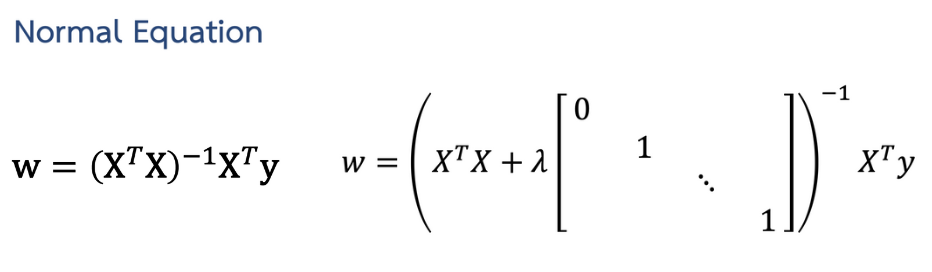
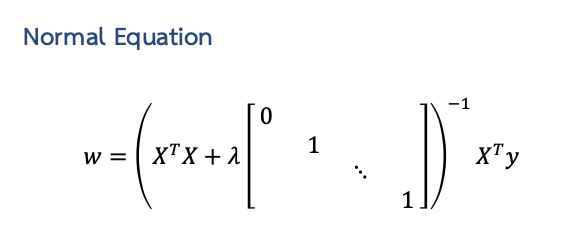

In [32]:
def normal_equation(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

def ridge_regression(X, y, alpha):
    # เพิ่ม bias term ใน X
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # คำนวณค่า beta
    I = np.eye(X_b.shape[1])
    I[0, 0] = 0  # ไม่ทำให้ bias term ถูก regularized
    beta = np.linalg.pinv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y)
    return beta



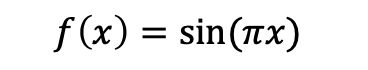

In [33]:
def sin_pi(x):
    return np.sin(np.dot(np.pi, x))

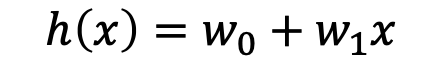

In [34]:

def hypothesis(x,w):
    return w[0] + w[1] * x

In [35]:
def plot_sin(w, mean, data, label):
    line_x = np.linspace(-1, 1, 100)
    for i in range(500):
        theta = w[i]
        line_y = hypothesis(line_x, theta)
        plt.plot(line_x, line_y, color = 'black', alpha=0.01) # plot line each g(x) 

    func_g = hypothesis(line_x, mean)
    plt.plot(line_x, func_g, color = 'r', alpha=1)  # plot mean g(x) 

    plt.plot(line_x, data, color = "#00FF00") # plot f(x)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(label)
    plt.axis([-1.1, 1.1, -2,  2])

In [36]:
Data_X = np.linspace(-1, 1, 100)
Data_Y = sin_pi(Data_X) # f(x) function sin*pi
w_normal = []
w_ridge = []
n = 100000 # จำนวน random


สุ่ม ข้อมูล 2 จุด จาก $𝑓(𝑥) = sin(𝜋𝑥)$ และ เก็บ Model $G^{(D)}(x)$

In [37]:
for i in range(n):
    sam_x = np.array(random.choices(Data_X, k=2))
    sam_y = sin_pi(sam_x)
    theta_normal = normal_equation(sam_x, sam_y)
    theta_ridge = ridge_regression(sam_x, sam_y, 0.45)
    w_normal.append(theta_normal)
    w_ridge.append(theta_ridge)


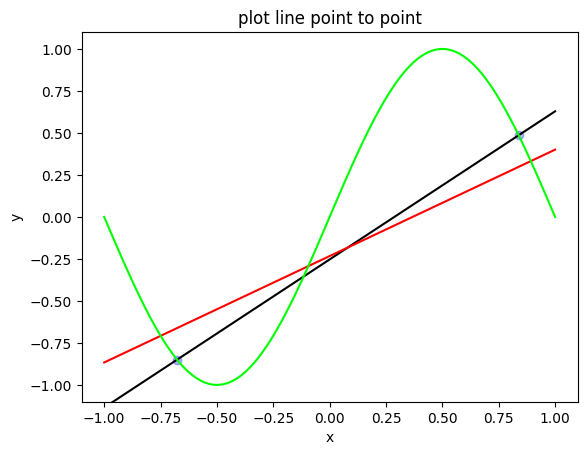

In [38]:
plt.scatter(sam_x, sam_y, color = "blue", marker='o', alpha=0.3) # plot point data

line_x = np.linspace(-1, 1, 100)
line_y = hypothesis(line_x,theta_normal)
plt.plot(line_x, line_y, color = 'black', alpha=1) # plot line normal ตัดจุด data 

line_y = hypothesis(line_x,theta_ridge)
plt.plot(line_x, line_y, color = 'red', alpha=1) # plot line ridge ตัดจุด data

plt.plot(Data_X, Data_Y, color = "#00FF00") # plot f(x)
plt.xlabel("x")
plt.ylabel("y")
plt.title('plot line point to point')
plt.axis([-1.1, 1.1, -1.1,  1.1])
plt.show()

Mean Normal: [0.00321421 0.7528655 ]
Mean Ridge: [0.00122779 0.30669838]


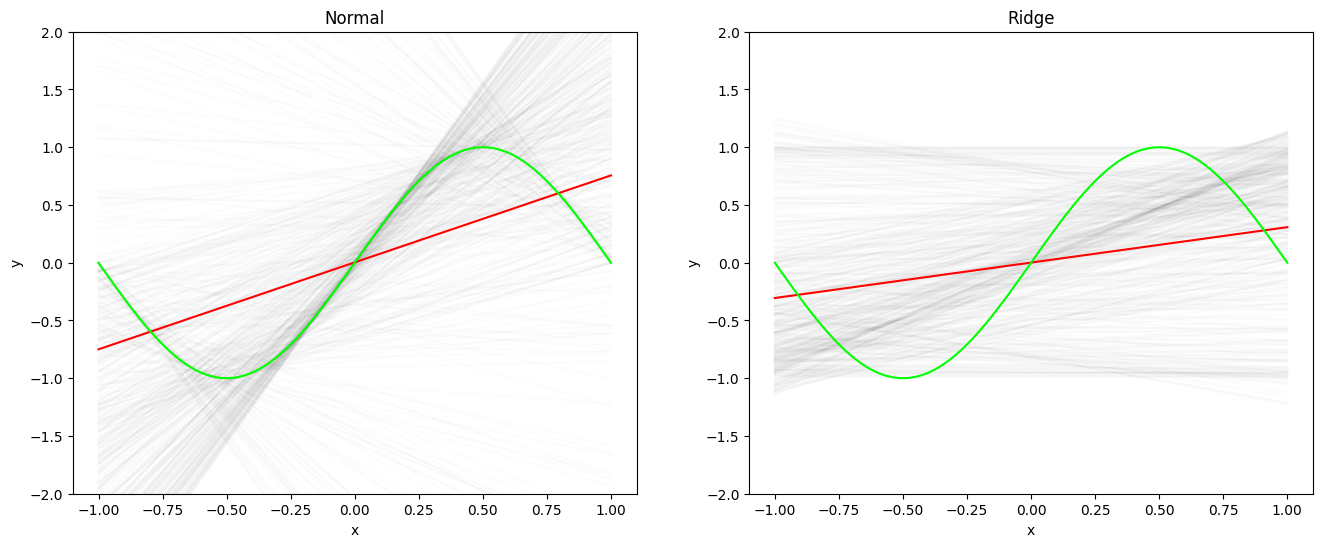

In [39]:
# mean g(x) 
mean_normal = np.mean(w_normal, axis=0)
mean_ridge = np.mean(w_ridge, axis=0)
print("Mean Normal:", mean_normal)
print("Mean Ridge:", mean_ridge)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_sin(w_normal, mean_normal, Data_Y, "Normal")

plt.subplot(1, 2, 2)
plot_sin(w_ridge, mean_ridge, Data_Y, "Ridge")
plt.show()

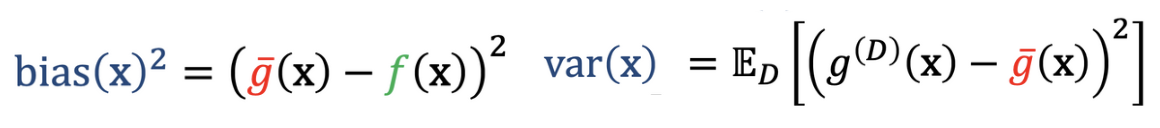

In [40]:
var_normal = []
var_ridge = []
gBar_normal = hypothesis(line_x,mean_normal)
gBar_ridge = hypothesis(line_x,mean_ridge)

for i in range(n):
    N_theta = w_normal[i]
    R_theta = w_ridge[i]
    gD_normal = hypothesis(line_x,N_theta)
    gD_ridge  = hypothesis(line_x,R_theta)
    var_normal.append((gD_normal-gBar_normal)**2)
    var_ridge.append((gD_ridge-gBar_ridge)**2)
    
variance_normal = np.mean(var_normal)
variance_ridge  = np.mean(var_ridge)
print(f"Variance Normal = {variance_normal:.2f}\tVariance Ridge = {variance_ridge:.2f}")

bias_normal =  np.mean((gBar_normal - Data_Y)**2)
bias_ridge  =  np.mean((gBar_ridge - Data_Y)**2)
print(f"Bias Normal = {bias_normal:.2f}\tBias Ridge = {bias_ridge:.2f}")

Eout_normal = bias_normal + variance_normal
Eout_ridge = bias_ridge + variance_ridge
print(f"E out Normal = {Eout_normal:.2f}\tE out Ridge = {Eout_ridge:.2f}")

Variance Normal = 1.68	Variance Ridge = 0.32
Bias Normal = 0.21	Bias Ridge = 0.33
E out Normal = 1.89	E out Ridge = 0.65
